In [22]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [5]:
bikes['weekday'] = bikes['datetime'].dt.weekday

In [6]:
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bikes['weekday'] = bikes['weekday'].map(day_map)
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Sat
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Sat
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Sat
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Sat
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wed
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wed
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wed
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wed


In [7]:
bikes['hour'] = bikes['datetime'].dt.hour

In [8]:
def get_time_of_day(x):
  if x in range(6,10):
    return 'MorningCommute'
  elif x in range(10,15):
    return 'Midday'
  elif x in range(15,19):
    return 'EveningCommute'
  else:
    return 'Night'

In [10]:
bikes['time_of_day'] = bikes['hour'].apply(get_time_of_day)

In [13]:
# one hot encode
model_data = pd.get_dummies(bikes, columns=['season','weather','weekday','time_of_day','hour'], drop_first=True, dtype=int)

In [14]:
model_data.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'season_2', 'season_3',
       'season_4', 'weather_2', 'weather_3', 'weather_4', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'time_of_day_Midday', 'time_of_day_MorningCommute',
       'time_of_day_Night', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [32]:
import statsmodels.api as sm

In [33]:
Y = model_data['count']
X = model_data.drop(columns=['datetime','count', 'casual','registered'])
X = sm.add_constant(X)

In [34]:
model = OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     468.2
Date:                Thu, 19 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:43:08   Log-Likelihood:                -66585.
No. Observations:               10886   AIC:                         1.333e+05
Df Residuals:                   10845   BIC:                         1.336e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [25]:
bikes[bikes['weekday']=='Thu']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,hour,time_of_day
115,2011-01-06 00:00:00,1,0,1,1,7.38,12.120,55,0.0000,0,11,11,Thu,0,Night
116,2011-01-06 01:00:00,1,0,1,1,6.56,11.365,64,0.0000,0,4,4,Thu,1,Night
117,2011-01-06 02:00:00,1,0,1,1,6.56,11.365,64,0.0000,0,2,2,Thu,2,Night
118,2011-01-06 04:00:00,1,0,1,2,6.56,9.850,64,6.0032,0,1,1,Thu,4,Night
119,2011-01-06 05:00:00,1,0,1,2,5.74,9.090,69,6.0032,0,4,4,Thu,5,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10737,2012-12-13 19:00:00,4,0,1,1,12.30,15.150,45,11.0014,20,328,348,Thu,19,Night
10738,2012-12-13 20:00:00,4,0,1,1,12.30,16.665,45,0.0000,6,235,241,Thu,20,Night
10739,2012-12-13 21:00:00,4,0,1,1,11.48,15.910,48,0.0000,13,200,213,Thu,21,Night
10740,2012-12-13 22:00:00,4,0,1,1,10.66,14.395,60,6.0032,7,141,148,Thu,22,Night


In [26]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,hour,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Sat,0,Night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Sat,1,Night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Sat,2,Night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Sat,3,Night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Sat,4,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wed,19,Night
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wed,20,Night
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wed,21,Night
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wed,22,Night


In [36]:
y_pred = model.predict(X)

In [37]:
y_pred

,0
0,-22.971138
1,-43.300727
2,-53.553588
3,-53.795465
4,-53.694479
...,...
10881,320.576137
10882,232.340334
10883,171.724761
10884,146.163698


In [39]:
bikes['count']

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [40]:
import seaborn as sns

<Axes: ylabel='Count'>

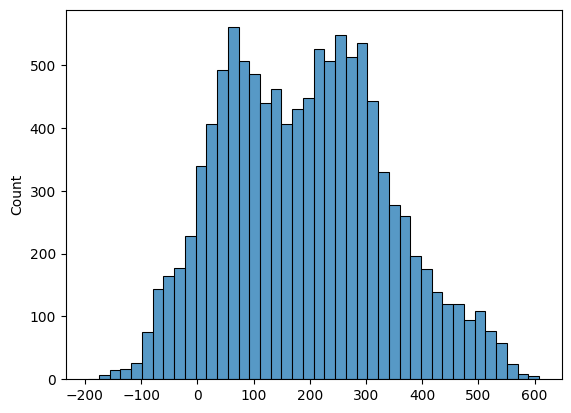

In [41]:
sns.histplot(y_pred)

<Axes: xlabel='count', ylabel='Count'>

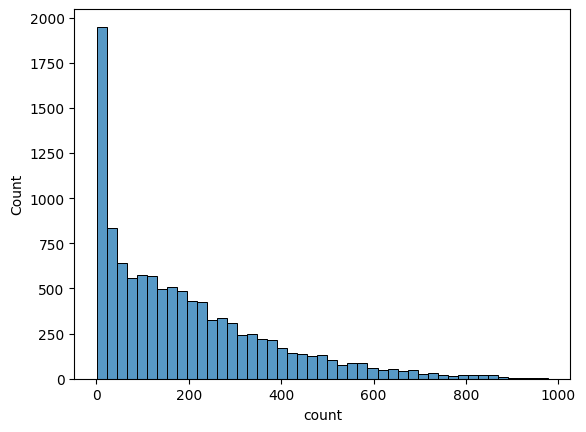

In [42]:
sns.histplot(bikes['count'])

In [43]:
res = y_pred - bikes['count']

<Axes: ylabel='Count'>

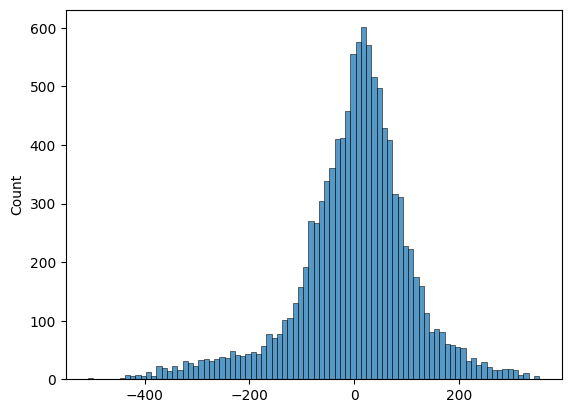

In [44]:
sns.histplot(res)

In [46]:
abs(res).mean()

np.float64(79.13407968211843)

In [47]:
bikes['count'].mean()

np.float64(191.57413191254824)

In [48]:
79/191

0.41361256544502617